## DATA CLEANING AND EDA

In [1]:
#import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_pickle("project2_data/SFproperty_df")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Address     1182 non-null   object
 1   Location    1182 non-null   object
 2   Price       1182 non-null   object
 3   Beds        1182 non-null   object
 4   Baths       1182 non-null   object
 5   Sq.Ft.      1182 non-null   object
 6   $/Sq.Ft.    1182 non-null   object
 7   On Redfin   1182 non-null   object
 8   HOA         1182 non-null   object
 9   Year Built  1182 non-null   object
 10  Lot Size    1182 non-null   object
 11  Date Sold   1182 non-null   object
 12  Zip Code    1182 non-null   object
 13  prop_type   1182 non-null   object
dtypes: object(14)
memory usage: 129.4+ KB


### Checking features and target in the dataset

In [5]:
#check for duplicates(2 of them) and drop the record with less info
df["Address"].duplicated().sum()
df[df["Address"].duplicated()]
print(df[df["Address"] == "2031 Hayes St"])
df.drop_duplicates(subset = ["Address"], inplace = True)
df[df["Address"] == "2031 Hayes St"]

           Address              Location       Price Beds Baths Sq.Ft.  \
599  2031 Hayes St  San Francisco County  $1,800,000    3   2.5  1,670   
698  2031 Hayes St                        $1,800,000    3     3      —   

    $/Sq.Ft. On Redfin   HOA Year Built Lot Size     Date Sold  \
599   $1,078  163 days  None       1910        —  AUG 10, 2020   
698        —         —  None       1910        —  AUG 10, 2020   

                Zip Code prop_type  
599  2031-Hayes-St-94117     condo  
698  2031-Hayes-St-94117     condo  


,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
599,2031 Hayes St,San Francisco County,"$1,800,000",3,2.5,"1,670","$1,078",163 days,None,1910,—,"AUG 10, 2020",2031-Hayes-St-94117,condo


In [6]:
#double check for duplicate
df.groupby(["Address", "Zip Code"])["Address"].count().sort_values(ascending = False).head()

Address             Zip Code              
1 Burnett Ave N #3  1-Burnett-Ave-N-94131     1
4031 Cabrillo St    4031-Cabrillo-St-94121    1
42 August Aly       42-August-Aly-94133       1
418 Ellsworth St    418-Ellsworth-St-94110    1
416 Broderick St    416-Broderick-St-94117    1
Name: Address, dtype: int64

In [7]:
#convert Date Sold to datetime object
df["Date Sold"] = pd.to_datetime(df["Date Sold"])
df["Date Sold"].value_counts().sort_index()
df["Date Sold"].value_counts(ascending = False)

2020-08-21    17
2020-12-01    15
2020-11-13    14
2020-12-11    14
2020-10-23    14
              ..
2020-04-10     1
2020-04-21     1
2020-03-18     1
2020-05-13     1
2020-03-10     1
Name: Date Sold, Length: 238, dtype: int64

In [8]:
#removing symbols in house Price
df["Price"] = ["".join(p.strip("$").split(",")) for p in df["Price"]]

#convert Price to numbers and check for missing values
df["Price"] = pd.to_numeric(df["Price"])
print(df["Price"].isna().sum()) #13 obs missing Price

#check possible outliers
print(len(df[df["Price"] > 5000000])) #are they considered outliers?
df[df["Price"] > 5000000].sort_values("Price", ascending = False).head()
df[df["Price"] < 500000].sort_values("Price")

13
28


,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
1140,2061 10th Ave,,27000.0,2,1,"1,178",$23,—,None,1947,"3,000 Sq. Ft.",2020-07-01,2061-10th-Ave-94116,multi_fam
638,1335 Filbert St #101,Russian Hill,187620.0,1,1,914,$205,209 days,$552/month,1924,—,2020-06-25,1335-Filbert-St-94109,condo
444,901 Bayshore Blvd #308,Silver Terrace,196842.0,1,1,530,$371,21 days,$382/month,2003,—,2020-12-30,901-Bayshore-Blvd-94124,condo
1132,101 Caselli Ave #103,,201500.0,4,5,—,—,—,None,1927,"2,596 Sq. Ft.",2020-10-08,101-Caselli-Ave-94114,multi_fam
1099,1157 Broadway,,214000.0,7,8,—,—,—,None,1923,—,2020-10-26,1157-Broadway-94109,multi_fam
305,33 Aladdin Ter,,305000.0,—,2,—,—,—,None,1907,"1,406 Sq. Ft.",2020-09-29,33-Aladdin-Ter-94133,house
489,55 Page St #315,SAN FRANCISCO,371490.0,1,1,750,$495,57 days,$542/month,2008,—,2020-11-24,55-Page-St-94102,condo
471,1346 Stevenson St Unit B201,South of Market,400000.0,1,1,600,$667,41 days,$449/month,1997,—,2020-12-10,1346-Stevenson-St-94103,condo
664,4569 Mission St #8,,400000.0,—,—,"1,541",$260,—,None,1979,—,2020-05-08,4569-Mission-St-94112,condo
584,83 McAllister #205Listing Agent: David Azimi,San Francisco,470000.0,0,1,254,"$1,850",152 days,$458/month,2007,—,2020-08-21,83-McAllister-St-94102,condo


In [9]:
#drop records with missing values in Price and a record with Price misrecorded
df.dropna(subset = ["Price"], axis = 0, inplace = True)
df.drop(df[df["Price"] == 27000].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 1179
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     1167 non-null   object        
 1   Location    1167 non-null   object        
 2   Price       1167 non-null   float64       
 3   Beds        1167 non-null   object        
 4   Baths       1167 non-null   object        
 5   Sq.Ft.      1167 non-null   object        
 6   $/Sq.Ft.    1167 non-null   object        
 7   On Redfin   1167 non-null   object        
 8   HOA         1167 non-null   object        
 9   Year Built  1167 non-null   object        
 10  Lot Size    1167 non-null   object        
 11  Date Sold   1167 non-null   datetime64[ns]
 12  Zip Code    1167 non-null   object        
 13  prop_type   1167 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(12)
memory usage: 136.8+ KB


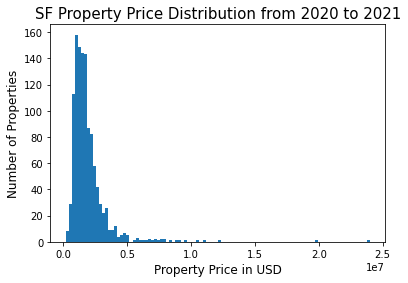

In [10]:
#look at property price distribution
plt.hist(df["Price"], bins = 100)
plt.title("SF Property Price Distribution from 2020 to 2021", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in USD", fontsize = 12);

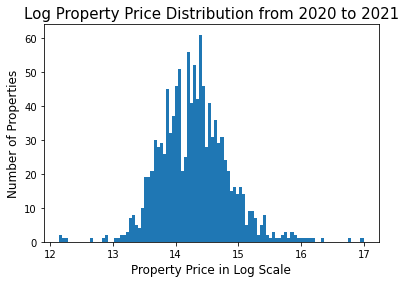

In [11]:
#Price distribution is right skewed, apply log transform
log_Price = np.log(df["Price"])

plt.hist(log_Price, bins = 100)
plt.title("Log Property Price Distribution from 2020 to 2021", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Property Price in Log Scale", fontsize = 12);

In [12]:
#check missing values in Location
print(len(df[df["Location"] == "—"]))
print(len(df[df["Location"] == ""])) #179 missing values for location, but guess Zip Code can approximate location!?

0
178


In [13]:
#check missing values in Beds and Baths
print(len(df[df["Beds"] == "—"])) #115 obs missing values in Beds
print(len(df[df["Baths"] == "—"])) #113 obs missing values in Baths

mask = (df["Beds"] == "—") & (df["Baths"] == "—")
print(len(df[mask])) #38 obs missing both Beds and Baths

#replace "—" in both Beds and Baths with none
df["Beds"].replace({"—":None}, inplace = True)
df["Baths"].replace({"—":None}, inplace = True)

115
113
38


In [14]:
#convert Beds to integer and Baths to float
#int vs float makes a difference in interpretation
df["Beds"] = pd.to_numeric(df["Beds"]).astype("Int64")
df["Baths"] = pd.to_numeric(df["Baths"])
df["Baths"].value_counts() #there can be 0.25 and 0.75 baths...o.O

2.00     338
1.00     233
3.00     122
2.50      83
4.00      76
3.50      55
1.50      50
5.00      26
4.50      15
6.00      14
8.00       7
5.50       6
1.25       5
7.00       4
1.75       3
12.00      3
6.50       3
2.25       3
10.00      2
2.75       1
7.50       1
16.00      1
19.00      1
24.00      1
9.00       1
Name: Baths, dtype: int64

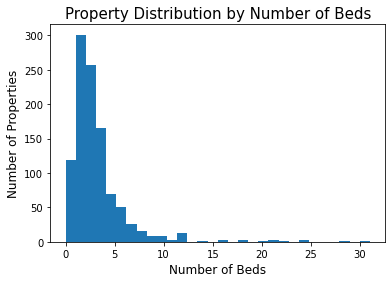

In [15]:
#look at distribution od property by number of bedrooms
Beds_noNA = df[df["Beds"].notnull()]["Beds"]

plt.hist(Beds_noNA, bins = 30)
plt.title("Property Distribution by Number of Beds", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Number of Beds", fontsize = 12);

In [16]:
#check missing values in house size(Sq.Ft.)
print(len(df[df["Sq.Ft."] == "—"])) #258 obs missing values in size

#removing symbols in house size(Sq.Ft.) and replacing "—" with null
df["Sq.Ft."] = ["".join(s.split(",")) for s in df["Sq.Ft."]]
df["Sq.Ft."].replace({"—":None}, inplace = True)

#convert size to numeric
df["Sq.Ft."] = pd.to_numeric(df["Sq.Ft."])
df["Sq.Ft."].isna().sum()

258


258

### LOOKING into missing values in size

In [17]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).head()

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
1132,101 Caselli Ave #103,,201500.0,4,5.0,NaN,—,—,None,1927,"2,596 Sq. Ft.",2020-10-08,101-Caselli-Ave-94114,multi_fam
1099,1157 Broadway,,214000.0,7,8.0,NaN,—,—,None,1923,—,2020-10-26,1157-Broadway-94109,multi_fam
305,33 Aladdin Ter,,305000.0,<NA>,2.0,NaN,—,—,None,1907,"1,406 Sq. Ft.",2020-09-29,33-Aladdin-Ter-94133,house
1174,527 Waller St,,500000.0,<NA>,1.0,NaN,—,—,None,1910,—,2020-08-05,527-Waller-St-94117,multi_fam
467,1050 North Pt #505,Russian Hill,549000.0,0,1.0,NaN,—,35 days,$505/month,—,—,2020-12-16,1050-N-Point-St-94109,condo


In [18]:
df[df["Sq.Ft."].isna()].sort_values("Price", ascending = True).tail()

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
343,2840 Green St,,8800000.0,5,4.0,NaN,—,—,None,1936,"3,438 Sq. Ft.",2020-12-08,2840-Green-St-94123,house
1175,1647 Sanchez St,,9100000.0,4,2.0,NaN,—,—,None,1900,"2,592 Sq. Ft.",2020-07-24,1647-Sanchez-St-94131,multi_fam
321,2561 Washington St,,9600000.0,5,3.0,NaN,—,—,None,1900,"5,105 Sq. Ft.",2020-03-11,2561-Washington-St-94115,house
1104,3959 Washington St,,10500000.0,5,4.0,NaN,—,—,None,1913,"3,632 Sq. Ft.",2020-10-30,3959-Washington-St-94118,multi_fam
81,2775 Vallejo St,Pacific Heights,19750000.0,6,6.5,NaN,—,21 days,None,1916,"6,806 Sq. Ft.",2020-12-30,2775-Vallejo-St-94123,house


In [19]:
#can I fill in missing size with Price/($/Sq.Ft.)??
#$/Sq.Ft. has more missing values than size, cannot be use to fill in missing values in size
mask = (df["Sq.Ft."].isna()) & (df["$/Sq.Ft."] == "—")
len(df[mask])

258

### ^ CONCLUSION: missing values can be filled in from individual property page <br> Should just drop those values instead of imputing (back to scraping if more time)

In [20]:
#check outliers in property size
df[df["Sq.Ft."] == 0] #2 listings have size 0, redfin records reported by owners
df[df["Sq.Ft."] > 10000].head()

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
147,190 Sea Cliff Ave,Sea Cliff,24000000.0,4,6.5,10725.0,"$2,238",69 days,None,1913,0.25 Acres,2020-11-12,190-Sea-Cliff-Ave-94121,house
878,2028 Scott St,Pacific Heights,6250000.0,21,NaN,11493.0,$544,14 days,None,1966,"5,292 Sq. Ft.",2021-01-06,2028-Scott-St-94115,multi_fam
905,1623-1633 California St,Nob Hill,6500000.0,10,NaN,15052.0,$432,40 days,None,1923,"6,873 Sq. Ft.",2020-12-11,1623-California-St-94109,multi_fam
926,3014 Clay St,Pacific Heights,7920000.0,24,NaN,12375.0,$640,72 days,None,1963,"6,381 Sq. Ft.",2020-11-09,3014-Clay-St-94115,multi_fam
929,25-35 Hoff St,Inner Mission,4125000.0,24,NaN,16470.0,$250,75 days,None,1907,"7,361 Sq. Ft.",2020-11-06,25-Hoff-St-94110,multi_fam


In [21]:
# remove missing values and 2 records with 0 size
mask = (df["Sq.Ft."].isna()) | (df["Sq.Ft."] == 0)
df.drop(df[mask].index, inplace = True)

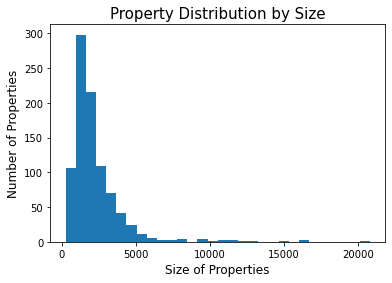

In [22]:
#look at distribution of property by size
plt.hist(df["Sq.Ft."], bins = 30)
plt.title("Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Size of Properties", fontsize = 12);

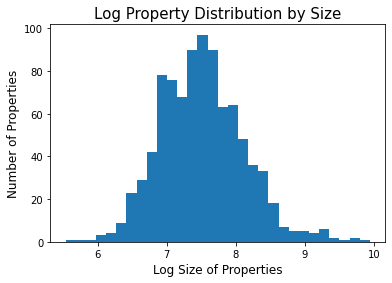

In [23]:
#size has right skewed distribution, log transform
plt.hist(np.log(df["Sq.Ft."]), bins = 30)
plt.title("Log Property Distribution by Size", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Log Size of Properties", fontsize = 12);

In [24]:
#check other missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 1163
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     907 non-null    object        
 1   Location    907 non-null    object        
 2   Price       907 non-null    float64       
 3   Beds        876 non-null    Int64         
 4   Baths       808 non-null    float64       
 5   Sq.Ft.      907 non-null    float64       
 6   $/Sq.Ft.    907 non-null    object        
 7   On Redfin   907 non-null    object        
 8   HOA         907 non-null    object        
 9   Year Built  907 non-null    object        
 10  Lot Size    907 non-null    object        
 11  Date Sold   907 non-null    datetime64[ns]
 12  Zip Code    907 non-null    object        
 13  prop_type   907 non-null    object        
dtypes: Int64(1), datetime64[ns](1), float64(3), object(9)
memory usage: 107.2+ KB


### NOW GOING BACK TO MISSING VALUES in Beds and Baths after removing missing values in size

In [25]:
#check missing values in Beds
print(df["Beds"].isna().sum())
df[df["Beds"].isna()].sort_values("prop_type").head()#still have 31 missing, 30 multi-family units...T.T
df[df["Beds"].isna()].sort_values("prop_type").tail()

31


,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
847,3256 Folsom St,Bernal Heights,1560000.0,<NA>,NaN,2023.0,$771,51 days,None,—,—,2020-11-30,3256-Folsom-St-94110,multi_fam
845,222-224 23rd Ave,Central Richmond,1520000.0,<NA>,NaN,2500.0,$608,47 days,None,1909,"2,996 Sq. Ft.",2020-12-04,222-23rd-Ave-94121,multi_fam
842,960-964 Filbert St,Russian Hill,2250000.0,<NA>,NaN,2740.0,$821,28 days,None,1913,"1,197 Sq. Ft.",2020-12-23,960-Filbert-St-94133,multi_fam
972,3716-3718 Taraval St,Outer Parkside,1016000.0,<NA>,NaN,2550.0,$398,110 days,None,1948,"2,495 Sq. Ft.",2020-10-02,3716-Taraval-St-94116,multi_fam
1163,311 Potrero Ave,,3625000.0,<NA>,6.0,4250.0,$853,—,None,1906,—,2020-02-14,311-Potrero-Ave-94103,multi_fam


In [26]:
len(df[df["prop_type"] == "multi_fam"])

254

In [27]:
#check missing values in Baths
print(df["Baths"].isna().sum())
df[df["Baths"].isna()].sort_values("prop_type").head(10)#still have 99 missing values, 92 multi-family units
df[df["Baths"].isna()].sort_values("prop_type").tail()

99


,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
924,17-23 Hoff St,Inner Mission,2000000.0,12,NaN,7896.0,$253,71 days,None,1910,"4,199 Sq. Ft.",2020-11-10,17-Hoff-St-94110,multi_fam
922,375 Carl St,Parnassus/Ashbury Heights,2585000.0,12,NaN,4260.0,$607,65 days,None,1961,"5,353 Sq. Ft.",2020-11-16,375-Carl-St-94117,multi_fam
936,1748 Grove St,North Panhandle,1555000.0,<NA>,NaN,3304.0,$471,82 days,None,1921,"3,571 Sq. Ft.",2020-10-30,1748-Grove-St-94117,multi_fam
1098,1445 Mason St,Nob Hill,6850000.0,22,NaN,13132.0,$522,365 days,None,1913,"5,497 Sq. Ft.",2020-01-21,1445-Mason-St-94133,multi_fam
725,99 Rausch St #521,South of Market,1300000.0,1,NaN,834.0,"$1,559",336 days,$720/month,2018,—,2020-02-19,99-Rausch-St-94103,townhouse


### ^ CONCLUSION: some values can be filled from indivial page, and both Beds and Baths are missing @ random (mostly missing in multi-family units) <br> Safe to drop NAs

In [28]:
#drop observations with missing values in Beds and Baths
df.dropna(subset = ["Beds", "Baths"], axis = 0, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 1138
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     807 non-null    object        
 1   Location    807 non-null    object        
 2   Price       807 non-null    float64       
 3   Beds        807 non-null    Int64         
 4   Baths       807 non-null    float64       
 5   Sq.Ft.      807 non-null    float64       
 6   $/Sq.Ft.    807 non-null    object        
 7   On Redfin   807 non-null    object        
 8   HOA         807 non-null    object        
 9   Year Built  807 non-null    object        
 10  Lot Size    807 non-null    object        
 11  Date Sold   807 non-null    datetime64[ns]
 12  Zip Code    807 non-null    object        
 13  prop_type   807 non-null    object        
dtypes: Int64(1), datetime64[ns](1), float64(3), object(9)
memory usage: 95.4+ KB


In [29]:
#check missing values in HOA
print(len(df[df["HOA"] == ""])) #no missing value in HOA
df["HOA"].value_counts() 

#turn HOA into numeric
df["HOA"] = ["".join(h.split("/")[0].strip("$").split(",")) for h in df["HOA"]]
df["HOA"].replace({"None":"0"}, inplace = True)
df["HOA"] = pd.to_numeric(df["HOA"])
df["HOA"].value_counts()

0


0       446
350      13
300      12
400       9
250       8
       ... 
420       1
425       1
426       1
431       1
1010      1
Name: HOA, Length: 265, dtype: int64

In [30]:
#check missing values in Year Built
print(len(df[df["Year Built"] == "—"])) #28 missing values in Year Built
df["Year Built"].replace({"—":None}, inplace = True)

#convert Year Built to an interger
df["Year Built"] = pd.to_numeric(df["Year Built"]).astype("Int64")
df["Year Built"].value_counts().sort_index(ascending = False)
df["Year Built"].isna().sum()

28


28

### LOOK at missing values in Year Built

In [31]:
df[df["Year Built"].isna()].sort_values("Price").head(8)

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
423,555 Fulton St #410,Hayes Valley,699000.0,1,1.0,512.0,"$1,365",237 days,486,<NA>,—,2020-05-28,555-Fulton-St-94102,condo
498,555 Fulton St #215,Hayes Valley,719000.0,1,1.0,708.0,"$1,016",63 days,680,<NA>,—,2020-11-18,555-Fulton-St-94102,condo
473,1163 Alabama St,Inner Mission,790000.0,2,1.0,988.0,$800,41 days,420,<NA>,—,2020-12-10,1163-Alabama-St-94110,condo
704,720 York #212,Inner Mission,800000.0,1,1.0,618.0,"$1,294",58 days,553,<NA>,—,2020-11-23,720-York-St-94110,townhouse
454,1050 North Pt #202,Russian Hill,850000.0,2,1.0,984.0,$864,27 days,1171,<NA>,—,2020-12-24,1050-N-Point-St-94109,condo
734,1376 A Natoma,Inner Mission,930000.0,3,2.0,1045.0,$890,9 days,350,<NA>,—,2021-01-11,1376-Natoma-St-94103,townhouse
590,1788 Clay St #806,Nob Hill,985000.0,1,1.0,657.0,"$1,499",154 days,633,<NA>,—,2020-08-19,1788-Clay-St-94109,condo
100,610 Holloway Ave,Ingleside,1065000.0,5,5.0,2300.0,$463,37 days,0,<NA>,"2,495 Sq. Ft.",2020-12-14,610-Holloway-Ave-94112,house


In [32]:
df[df["Year Built"].isna()].sort_values("Price").tail()

,Address,Location,Price,Beds,Baths,Sq.Ft.,$/Sq.Ft.,On Redfin,HOA,Year Built,Lot Size,Date Sold,Zip Code,prop_type
733,1788 Clay St Unit TH3,Nob Hill,2200000.0,3,2.0,1710.0,"$1,287",7 days,955,<NA>,—,2021-01-13,1788-Clay-St-94109,townhouse
239,152 Fairmount St,Glen Park,2400000.0,3,2.0,1716.0,"$1,399",180 days,0,<NA>,"3,125 Sq. Ft.",2020-07-24,152-Fairmount-St-94131,house
7,28-30 Santa Marina,Bernal Heights,2500000.0,6,4.0,2872.0,$870,110 days,0,<NA>,"2,500 Sq. Ft.",2020-10-02,28-30-Santa-Marina-St-94110,house
510,369 Arguello Blvd,Inner Richmond,3250000.0,5,2.5,3315.0,$980,71 days,200,<NA>,—,2020-11-10,369-Arguello-Blvd-94118,condo
87,3041 Laguna,Cow Hollow,5795000.0,5,4.5,3774.0,"$1,536",23 days,0,<NA>,—,2020-12-28,3041-Laguna-St-94123,house


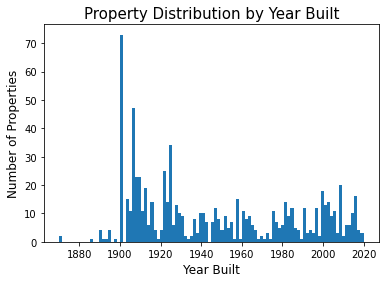

In [33]:
#look at distribution of Year Built
YB_noNA = df[df["Year Built"].notnull()]["Year Built"]
plt.hist(YB_noNA, bins = 100)
plt.title("Property Distribution by Year Built", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Year Built", fontsize = 12);

### ^ CONCLUSION: Looks like missing at completely random, info. can be found in individual page <br> Impute with random sampling from the range of Year Built

In [34]:
#number of NAs in Year Built
mask = df["Year Built"].isna()
YB_NAs = mask.sum()

#fill in NAs with random sampling
fill = np.random.choice(df[df["Year Built"].notnull()]["Year Built"].values, size = YB_NAs)
df.loc[mask, "Year Built"] = fill

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 0 to 1138
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     807 non-null    object        
 1   Location    807 non-null    object        
 2   Price       807 non-null    float64       
 3   Beds        807 non-null    Int64         
 4   Baths       807 non-null    float64       
 5   Sq.Ft.      807 non-null    float64       
 6   $/Sq.Ft.    807 non-null    object        
 7   On Redfin   807 non-null    object        
 8   HOA         807 non-null    int64         
 9   Year Built  807 non-null    Int64         
 10  Lot Size    807 non-null    object        
 11  Date Sold   807 non-null    datetime64[ns]
 12  Zip Code    807 non-null    object        
 13  prop_type   807 non-null    object        
dtypes: Int64(2), datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 96.1+ KB


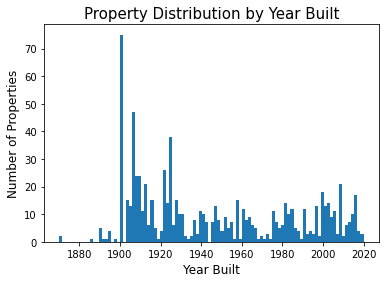

In [36]:
#double check distribution of Year Built
plt.hist(df["Year Built"], bins = 100)
plt.title("Property Distribution by Year Built", fontsize = 15)
plt.ylabel("Number of Properties", fontsize = 12)
plt.xlabel("Year Built", fontsize = 12);

In [37]:
#check missing values in Lot Size and Date Sold
print(len(df[df["Lot Size"] == "—"])) #368 missing values in LotSize, make sense to be missing for condo

print(len(df[df["Date Sold"] == "—"]))
print(len(df[df["Date Sold"] == ""])) #0 missing values in Date Sold, should divide in month and year

#extract the year and month from Date Sold
df["year_sold"] = pd.DatetimeIndex(df["Date Sold"]).year
df["month_sold"] = pd.DatetimeIndex(df["Date Sold"]).month

368
0
0


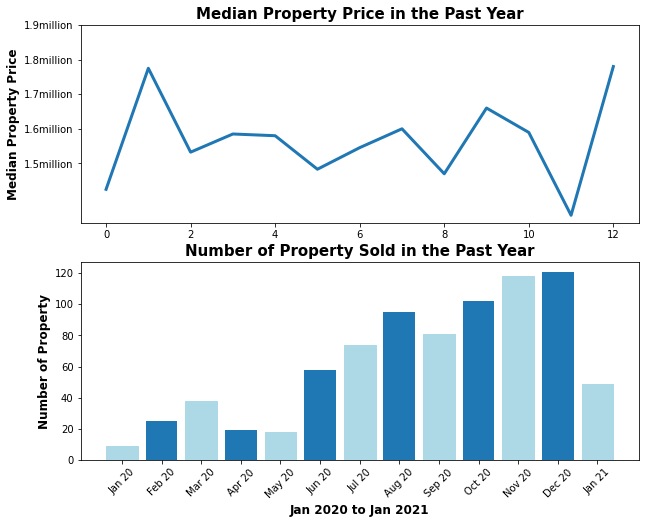

In [38]:
#Does property price goes up or down the past year?
price_month = df.groupby(["year_sold", "month_sold"])["Price"].median()
num_prop = df.groupby(["year_sold", "month_sold"])["Price"].count()

plt.figure(figsize = [10, 8])

plt.subplot(2,1,1)
plt.plot(range(len(price_month)), price_month, linewidth = 3)
plt.title("Median Property Price in the Past Year", fontsize = 15, weight = "bold")
plt.ylabel("Median Property Price", fontsize = 12, weight = "bold")
ytick_lab = ["1.5million", "1.6million", "1.7million", "1.8million", "1.9million"]
plt.yticks(ticks = list(range(1500000, 2000000, 100000)), labels = ytick_lab)

plt.subplot(2,1,2)
#change color of every other bar
barlist = plt.bar(range(len(num_prop)), num_prop)
for bar in range(0, len(barlist), 2):
    barlist[bar].set_color("lightblue")
plt.title("Number of Property Sold in the Past Year", fontsize = 15, weight = "bold")
plt.ylabel("Number of Property", fontsize = 12, weight = "bold")
plt.xlabel("Jan 2020 to Jan 2021", fontsize = 12, weight = "bold")
xtick_lab = ["Jan 20", "Feb 20", "Mar 20", "Apr 20", "May 20", "Jun 20", 
             "Jul 20", "Aug 20", "Sep 20", "Oct 20", "Nov 20", "Dec 20", "Jan 21"]
plt.xticks(range(len(price_month)), xtick_lab, rotation = 45)
plt.savefig("median_price_past_year.svg");

In [39]:
#check missing values in Zip Code
print(len(df[df["Zip Code"] == "—"]))
print(len(df[df["Zip Code"] == ""])) #0 missing values in Zip Code, need to extract Zip Code from of the string

#extrac zip code from the string
df["Zip Code"] = [zip.split("-")[-1] for zip in df["Zip Code"]]
df["Zip Code"].value_counts()

0
0


94109    81
94110    73
94114    68
94121    64
94122    54
94112    54
94131    50
94118    49
94117    47
94107    45
94115    41
94123    29
94103    25
94102    24
94133    21
94124    20
94132    17
94134    15
94116     9
94127     8
94105     4
94108     3
94158     3
94111     2
94014     1
Name: Zip Code, dtype: int64

In [40]:
#one zip code (one listing) maps to Daly City, delete
df.drop(df[df["Zip Code"] == "94014"].index, inplace = True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 806 entries, 0 to 1138
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Address     806 non-null    object        
 1   Location    806 non-null    object        
 2   Price       806 non-null    float64       
 3   Beds        806 non-null    Int64         
 4   Baths       806 non-null    float64       
 5   Sq.Ft.      806 non-null    float64       
 6   $/Sq.Ft.    806 non-null    object        
 7   On Redfin   806 non-null    object        
 8   HOA         806 non-null    int64         
 9   Year Built  806 non-null    Int64         
 10  Lot Size    806 non-null    object        
 11  Date Sold   806 non-null    datetime64[ns]
 12  Zip Code    806 non-null    object        
 13  prop_type   806 non-null    object        
 14  year_sold   806 non-null    int64         
 15  month_sold  806 non-null    int64         
dtypes: Int64(2), datetime64[n

In [42]:
df.to_pickle("/Users/sarazzzz/Desktop/Metis/CAMP/Metis_project2/prop_df_cleaned")